# Problem Statement: 

- Refer Telecom Churn Dataset. Apply appropriate EDA methods wherever required   and perform feature engineering. Construct a model using a suitable             regression algorithm to find whether the customer will churn or not(Y/N).       Analyze the performance of the model with suitable evaluation measures. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/M.sc Data Science clg/DS SEM 2/ML Assignments/Assignment no 3/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.shape

(7043, 21)

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [7]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
data['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [12]:
# renaming 'tenure' and 'gender'
data = data.rename(columns={'tenure': 'Tenure', 'gender': 'Gender'})

# converting 'TotalCharges' to numerical data type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce', downcast='float')

# converting 'SeniorCitizen' to object data type
data['SeniorCitizen'] = data['SeniorCitizen'].astype(np.object)

# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#EDA

In [13]:
data.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

In [ ]:
# Target Variable

Text(0.5, 1.0, 'Churn vs Non Churn')

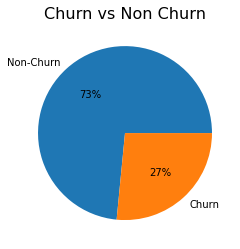

In [13]:
# Pie chart of churn
churn_rate = data.Churn.value_counts() / len(data.Churn)
labels = 'Non-Churn', 'Churn'

fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Churn vs Non Churn', fontsize=16)

In [14]:
# Numeric Features

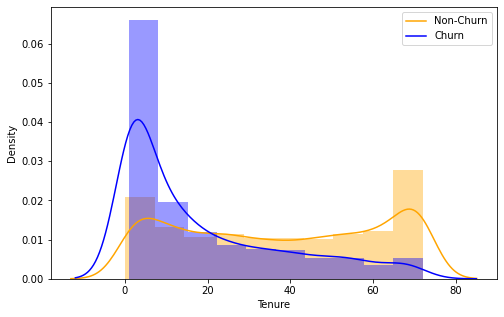

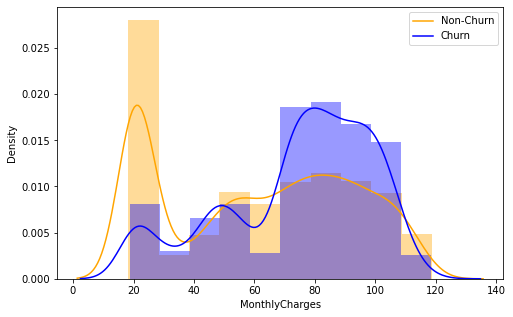

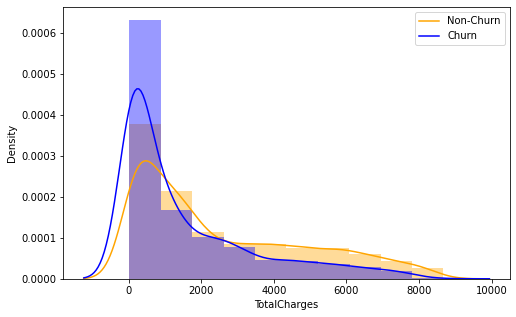

In [15]:
# numerical features grouped by churn
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,5))
    sns.distplot(data[data.Churn == 'No'][col],
                 bins=10,
                 color='orange',
                 label='Non-Churn',
                 kde=True)
    sns.distplot(data[data.Churn == 'Yes'][col],
                 bins=10,
                 color='blue',
                 label='Churn',
                 kde=True)
    plt.legend(labels)

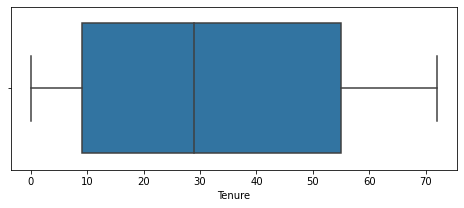

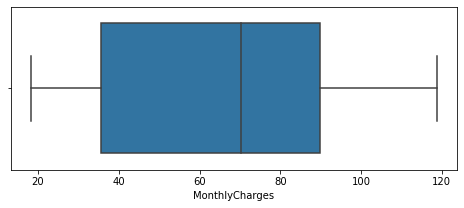

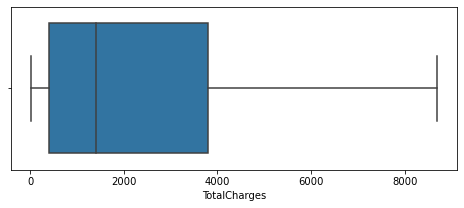

In [16]:
# check outliers
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(data[col])

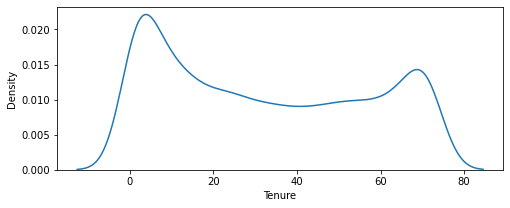

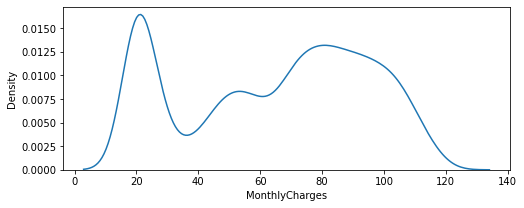

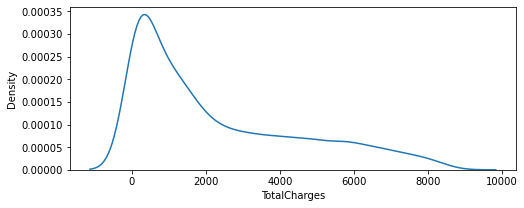

In [17]:
# Skewness: The density plots show they are not normal distributions.

# distribution
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(data[col])

<AxesSubplot:>

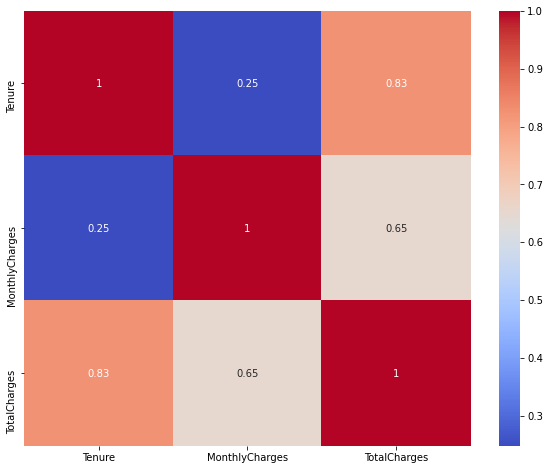

In [20]:
#Correlation: The correlation matrix plot shows that these numeric features have a positive relationship.

# correlation between numerical features
plt.figure(figsize=(10, 8))
feature_corr = data.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

In [21]:
# Categorical feature

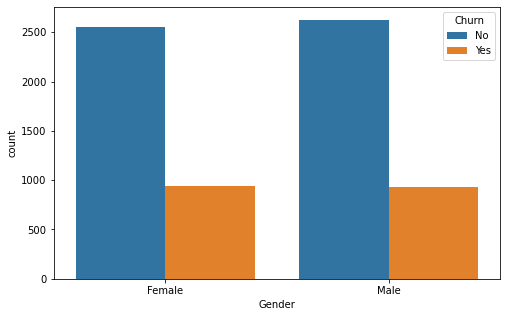

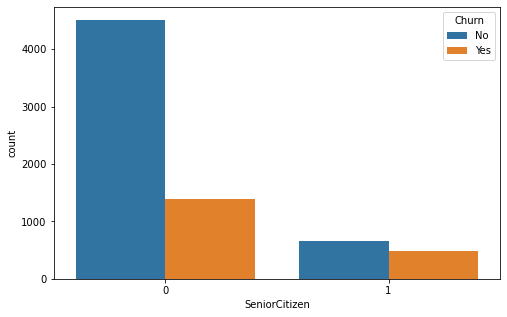

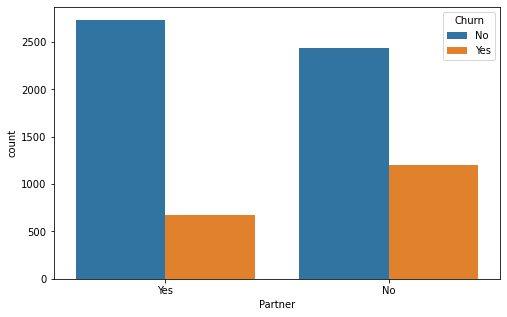

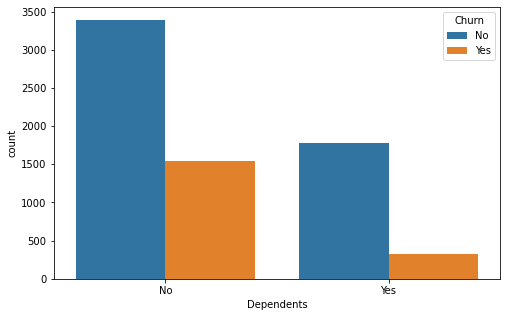

In [22]:
for col in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=data, palette="tab10")
    plt.show()

In [23]:
# Data Preprocessing

In [ ]:
# 1.Removing Duplicates

In [24]:
# summarize duplicates
sum(data.duplicated('customerID'))
#df2 = df.drop_duplicates('customerID')


0

In [25]:
# 2.dropping unnecessary columns
# remove customerID and PhoneService
df2 = data.drop(['customerID'], axis = 1)
df2.head(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


# Categorical data encoding
- Encode categorical variables, we use One-Hot Encoding for nominal variables and Label Encoding for ordinal variables.

  One-Hot Encoding: Gender, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Churn

  Label Encoding: Contract

In [27]:
# Dummy Variables(One-Hot Encoding)
Gender = pd.get_dummies(df2['Gender'], prefix='Genger', drop_first=True)
Partner = pd.get_dummies(df2['Partner'], prefix='Partner', drop_first=True)
Dependents = pd.get_dummies(df2['Dependents'], prefix='Dependents', drop_first=True)
MultipleLines = pd.get_dummies(df2['MultipleLines'], prefix='MultipleLines', drop_first=True)
InternetService = pd.get_dummies(df2['InternetService'], prefix='InternetService', drop_first=True)
OnlineSecurity = pd.get_dummies(df2['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)
OnlineBackup = pd.get_dummies(df2['OnlineBackup'], prefix='OnlineBackup', drop_first=True)
DeviceProtection = pd.get_dummies(df2['DeviceProtection'], prefix='DeviceProtection', drop_first=True)
TechSupport = pd.get_dummies(df2['TechSupport'], prefix='TechSupport', drop_first=True)
StreamingTV = pd.get_dummies(df2['StreamingTV'], prefix='StreamingTV', drop_first=True)
StreamingMovies = pd.get_dummies(df2['StreamingMovies'], prefix='StreamingMovies', drop_first=True)
PaperlessBilling = pd.get_dummies(df2['PaperlessBilling'], prefix='PaperlessBilling', drop_first=True)
PaymentMethod = pd.get_dummies(df2['PaymentMethod'], prefix='PaymentMethod', drop_first=True)
Churn = pd.get_dummies(df2['Churn'], prefix='Churn', drop_first=True)
PaymentMethod = pd.get_dummies(df2['PhoneService'], prefix='PhoneService', drop_first=True)


df3 = pd.concat([df2, Gender, Partner, Dependents, MultipleLines, InternetService, 
                 OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, 
                 StreamingMovies, PaperlessBilling, PaymentMethod, Churn], axis=1)

In [28]:
# Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['Contract']= label_encoder.fit_transform(df3['Contract']) 

In [29]:
# drop original columns
list = ['Gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
'PaymentMethod', 'Churn', 'Contract', 'PhoneService']
df3.drop(df3[list], axis=1, inplace=True)
df3.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Genger_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PhoneService_Yes,Churn_Yes
0,0,1,29.85,29.850000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,34,56.95,1889.500000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,45,42.30,1840.750000,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,2,70.70,151.649994,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1


# Splitting the Data into Training Set(70%) and Test Set(30%)
- We split the data in 70:30 ratio so that 70% of the data will be used for training the model while 30% will be used for testing the model.

In [30]:
# train test split
from sklearn.model_selection import train_test_split # split dataset
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Churn_Yes',axis=1),df3['Churn_Yes'],test_size=0.3,random_state=101)

In [39]:
# Identifying missing values

In [40]:
#summarize missing values - X_train
X_train.isnull().sum()

SeniorCitizen                           0
Tenure                                  0
MonthlyCharges                          0
TotalCharges                            9
Genger_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
PaperlessBilling_Yes              

In [41]:
# fill missing value w/ mean 
X_train['TotalCharges'].fillna(value=X_train['TotalCharges'].mean(), inplace=True)
# check missing values
X_train.isnull().sum()

SeniorCitizen                           0
Tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
Genger_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
PaperlessBilling_Yes              

In [42]:
#summarize missing values - y_train
y_train.isnull().sum()

0

In [43]:
#summarize missing values - X_test
X_test.isnull().sum()

SeniorCitizen                           0
Tenure                                  0
MonthlyCharges                          0
TotalCharges                            2
Genger_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
PaperlessBilling_Yes              

In [44]:
# fill missing value w/ mean 
X_test['TotalCharges'].fillna(value=X_test['TotalCharges'].mean(), inplace=True)
# check missing values
X_test.isnull().sum()

SeniorCitizen                           0
Tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
Genger_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
PaperlessBilling_Yes              

In [45]:
# Checking for outliers

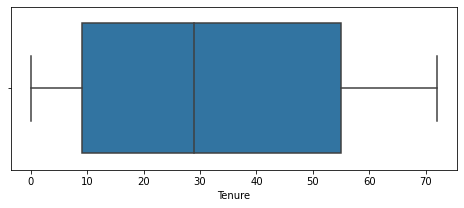

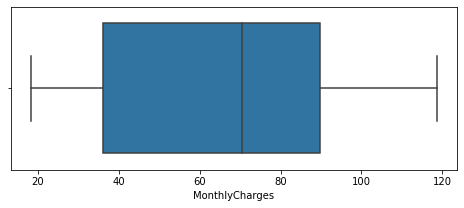

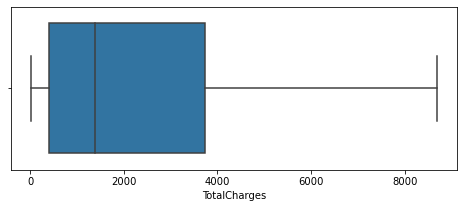

In [46]:
# check outliers
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(X_train[col])

# 7. Feature Scaling - Standardization / Normalization

In [47]:
## Standardization
standard_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

#from sklearn.preprocessing import StandardScaler
#scaler_s = StandardScaler() 
#data_standard_scaled = scaler_s.fit_transform(data)

In [48]:
# Normalization
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

#from sklearn.preprocessing import MinMaxScaler
#scaler_m = MinMaxScaler() 
#data_normal_scaled = scaler_m.fit_transform(data)

# Model Building

In [49]:
# training 
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=0, max_iter=1000, solver='lbfgs', class_weight='balanced')
lm.fit(X_train_standard, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [50]:
# predicting
y_pred = lm.predict(X_test_standard)

In [51]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1546
           1       0.53      0.75      0.62       567

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.75      0.76      2113



In [52]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1168  378]
 [ 142  425]]


In [54]:
# performance matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score, roc_auc_score
accuracy = round(accuracy_score(y_test, y_pred),2)
f1_score = round(f1_score(y_test, y_pred),2)
precision = round(precision_score(y_test, y_pred),2)
recall = round(recall_score(y_test, y_pred),2)
y_prob_scores_test = lm.predict_proba(X_test_standard)[:,1]
auc_score = round(roc_auc_score(y_test, y_prob_scores_test),2)

#logis
from astropy.table import Table
dict1 = [{'accuracy': accuracy, 'f1_score': f1_score, 'precision': precision, 'recall': recall, 'auc_score': auc_score}]
logis_matrix = Table(rows=dict1)
print(logis_matrix)

accuracy f1_score precision recall auc_score
-------- -------- --------- ------ ---------
    0.75     0.62      0.53   0.75      0.84


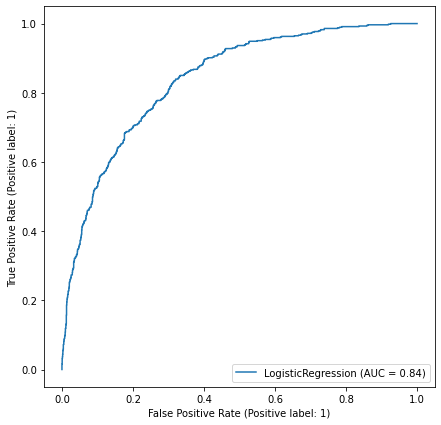

In [55]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(lm, X_test_standard, y_test, ax = ax)

# Conclusion
- Based on the performance metrics below, the best model is Logistic Regression with F1-score of 62% and auc score of 0.84.